In [1]:
import relations as rl
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns

In [2]:
data=pd.read_csv('car data.csv')

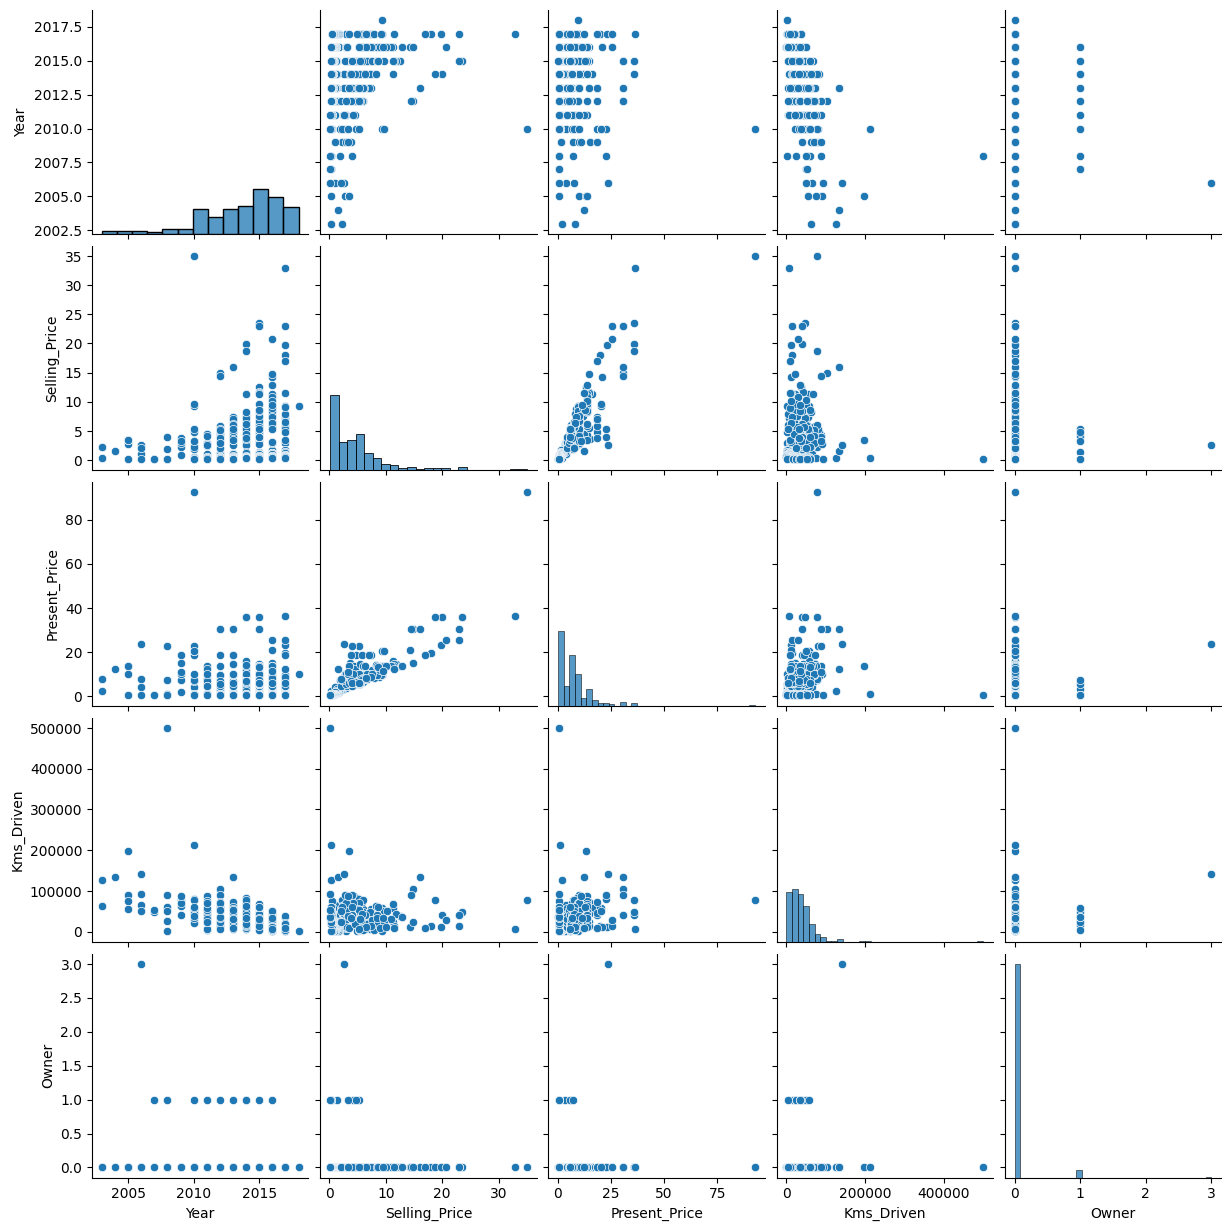

In [3]:
sns.pairplot(data)

In [4]:
train_data=data.sample(frac=0.8,random_state=200)
x_train=train_data['Selling_Price']
y_train=train_data['Present_Price']
test_data=data.drop(train_data.index)
x_test=test_data['Selling_Price']
y_test=test_data['Present_Price']

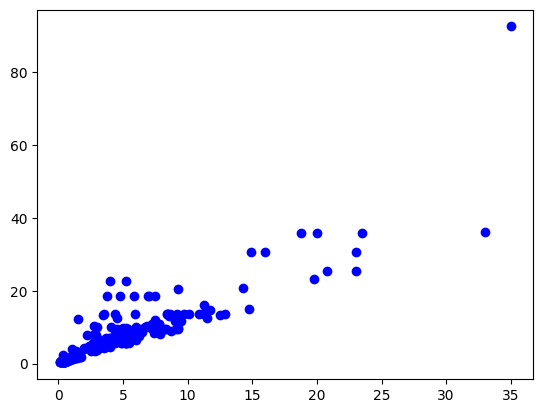

In [5]:
plt.scatter(x_train,y_train,color='blue',label='Training Data')

In [6]:
Lr=0.0001
epochs=1000

In [7]:
a,b=rl.gradient_descent(x_train,y_train,Lr,epochs)

Iteration 0: MSE=137.74800016065566, a=0.015663221045643154, b=0.0015407082213623464
Iteration 100: MSE=33.25251585267286, a=0.9950266702593037, b=0.098696434018324
Iteration 200: MSE=19.494675522474886, a=1.3502490444627182, b=0.13532100697338256
Iteration 300: MSE=17.6829863675454, a=1.4790066050221233, b=0.14996781837116469
Iteration 400: MSE=17.44407929217052, a=1.5255940219001172, b=0.15662590839089963
Iteration 500: MSE=17.412242899107994, a=1.5423678225914885, b=0.16037127344530017
Iteration 600: MSE=17.40767521801367, a=1.5483252760547055, b=0.1630458585751496
Iteration 700: MSE=17.406704963181458, a=1.55035942452098, b=0.16531814919930204
Iteration 800: MSE=17.406215832104525, a=1.550971357044483, b=0.16743084572367994
Iteration 900: MSE=17.40579750359407, a=1.55106856632564, b=0.16947215325295534


In [8]:
print("Trained parameters: a =",a," b =",b)

Trained parameters: a = 1.5509816379617154  b = 0.17145434396457954


In [9]:
rl.predictions(x_test,y_test,a,b)

For x=4.75, predicted y=7.538617124282728, actual y=9.54
For x=2.85, predicted y=4.591752012155468, actual y=4.15
For x=6.75, predicted y=10.64058040020616, actual y=8.12
For x=6.5, predicted y=10.25283499071573, actual y=8.61
For x=2.25, predicted y=3.6611630293784394, actual y=7.21
For x=1.95, predicted y=3.1958685379899245, actual y=7.15
For x=23.0, predicted y=35.84403201708403, actual y=30.61
For x=18.0, predicted y=28.089123827275458, actual y=19.77
For x=3.6, predicted y=5.754988240626755, actual y=15.04
For x=5.5, predicted y=8.701853352754014, actual y=14.68
For x=14.5, predicted y=22.660688094409455, actual y=30.61
For x=2.5, predicted y=4.048908438868868, actual y=23.73
For x=4.75, predicted y=7.538617124282728, actual y=6.76
For x=17.0, predicted y=26.538142189313742, actual y=18.64
For x=9.65, predicted y=15.138427150295135, actual y=20.45
For x=1.35, predicted y=2.2652795552128957, actual y=2.37
For x=1.05, predicted y=1.7999850638243806, actual y=1.9
For x=0.8, predicted

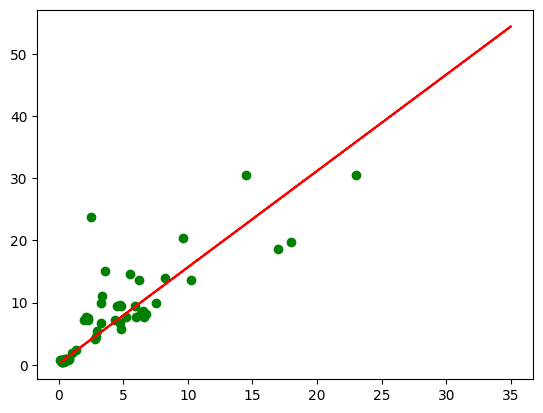

In [10]:
plt.scatter(x_test,y_test,color='green',label='Testing Data')
plt.plot(x_train, a*x_train + b, color='red', label='Regression Line')